<a href="https://colab.research.google.com/github/SnehaRGowda/Amazon-Customer-Review/blob/master/Amazon_customer_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer reviews of amazon products**

**Import required** **libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import np_utils
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Dataset**

In [2]:
data = pd.read_csv("/content/1429_1.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,NaN,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Am

In [4]:
data['manufacturer'].value_counts()

Amazon                          34639
Amazon Digital Services, Inc       21
Name: manufacturer, dtype: int64

**Check for missing values in the dataset**

In [5]:
data.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

**Take reviews.text and reviews.rating as a seperate dataframe as we will deal with only those two features in the project**

In [0]:
df = data[['reviews.text','reviews.rating']]

In [7]:
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [8]:
df.shape

(34660, 2)

In [9]:
df.isnull().sum()

reviews.text       1
reviews.rating    33
dtype: int64

In [10]:
df[df['reviews.text'].isnull()] #reviews.text which has nan value

,reviews.text,reviews.rating
3111,NaN,5.0


In [0]:
df1=df.drop(df.index[3111]) #drop that row

In [12]:
df1

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [13]:
df[df['reviews.rating'].isnull()] # reviews.rating which has nan values

,reviews.text,reviews.rating
2886,The Kindle is my first e-ink reader. I own an ...,NaN
2887,"I'm a first-time Kindle owner, so I have nothi...",NaN
2888,UPDATE NOVEMBER 2011:My review is now over a y...,NaN
2889,"I'm a first-time Kindle owner, so I have nothi...",NaN
2890,I woke up to a nice surprise this morning: a n...,NaN
2891,The Kindle is my first e-ink reader. I own an ...,NaN
2892,UPDATE NOVEMBER 2011:br /br /My review is now ...,NaN
2893,I woke up to a nice surprise this morning: a n...,NaN
2894,I use to hate to read but now that I have my K...,NaN
2895,All of them quit working. There's absolutely n...,NaN


In [14]:
df1.isnull().sum()

reviews.text       0
reviews.rating    33
dtype: int64

In [15]:
df1['reviews.rating'].mean() 

4.584560734708023

In [0]:
df2=df1.fillna(df1['reviews.rating'].mean()) #repalce nan values with the mean of it

In [17]:
df2

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [18]:
df2.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

**Distribution graph (bar graph) of reviews.rating:**

In [0]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (8 * nGraphPerRow, 10 * nGraphRow), dpi = 50, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

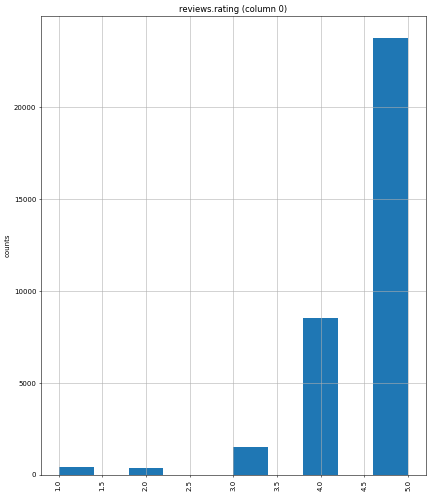

In [0]:
plotPerColumnDistribution(df, 10, 5)

**Word Cloud for names**

<Figure size 720x432 with 0 Axes>

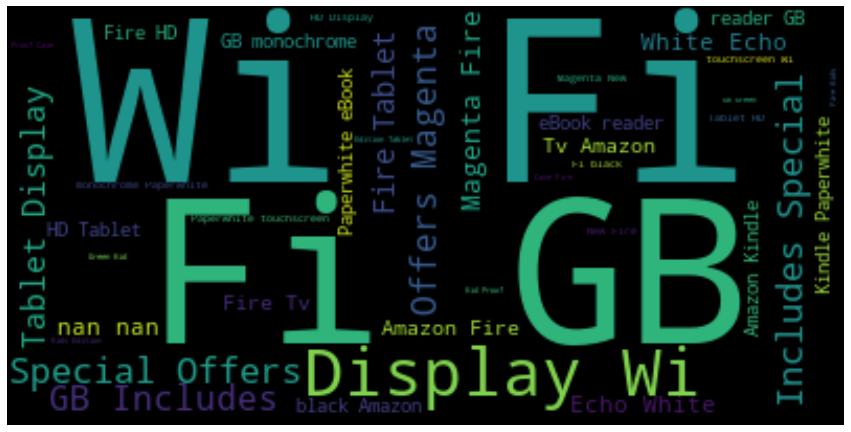

In [0]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

**The variations in reviews rating based on 'id'(Product id)**

In [0]:
data1 = data.groupby("id").mean().reset_index()

In [0]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

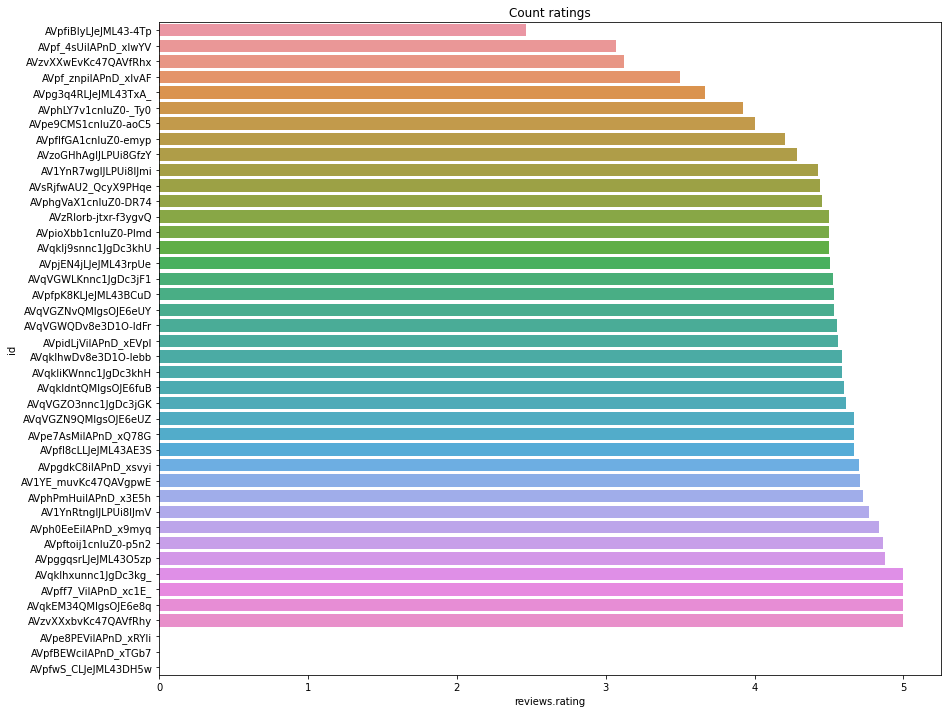

In [0]:
plt.figure(figsize=(14,12))
sns.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

## **Data Pre-processing and Using TFIDF**

**TFIDF Vectorizer**

TFIDF is the abbreviation of Term Frequency and Inverse Document Frequency.

Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. It tells you that the token 'me' is represented as feature number 8 in the output matrix.

**Tokenize and build vocab**

In [0]:
tfidf = TfidfVectorizer()
tfidf.fit(df2['reviews.text'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

**Initialize target**

In [0]:
target = np.array(df2['reviews.rating'],dtype='int')

**Encode Document**

In [0]:
vector = tfidf.transform(df2['reviews.text'].values)

In [0]:
vector = vector.toarray()

In [0]:
vector.shape

(34659, 13994)

In [0]:
tsvd = TruncatedSVD(n_components=100)
tsvd.fit(vector)
scaled = tsvd.transform(vector)

In [0]:
print(scaled.shape)

(34659, 100)


**Define the Sequential model**

In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(40, input_shape=[100,], activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(6, activation='softmax')
]) 

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

**Train the model**

In [0]:
model.fit(scaled, target, epochs=40,verbose=1, validation_split=0.1)

Epoch 1/40
975/975 [==============================] - 2s 2ms/step - loss: 0.8358 - accuracy: 0.6836 - val_loss: 0.6374 - val_accuracy: 0.7773
Epoch 2/40
975/975 [==============================] - 2s 2ms/step - loss: 0.7430 - accuracy: 0.6958 - val_loss: 0.6299 - val_accuracy: 0.7796
Epoch 3/40
975/975 [==============================] - 2s 2ms/step - loss: 0.7356 - accuracy: 0.6988 - val_loss: 0.6302 - val_accuracy: 0.7804
Epoch 4/40
975/975 [==============================] - 1s 1ms/step - loss: 0.7298 - accuracy: 0.6995 - val_loss: 0.6166 - val_accuracy: 0.7810
Epoch 5/40
975/975 [==============================] - 1s 1ms/step - loss: 0.7243 - accuracy: 0.7005 - val_loss: 0.6191 - val_accuracy: 0.7799
Epoch 6/40
975/975 [==============================] - 1s 1ms/step - loss: 0.7188 - accuracy: 0.7018 - val_loss: 0.6186 - val_accuracy: 0.7816
Epoch 7/40
975/975 [==============================] - 1s 1ms/step - loss: 0.7130 - accuracy: 0.7040 - val_loss: 0.6234 - val_accuracy: 0.7790
Epoch 

**Accuracy graph**

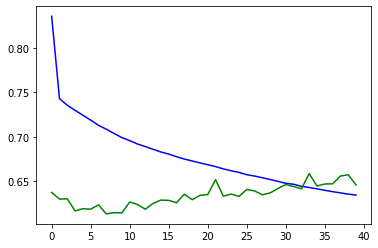

In [0]:
plt.plot(model.history.epoch, model.history.history['loss'],'b',
         model.history.epoch, model.history.history['val_loss'], 'g')

## **Using** **word embeddings**

**In word embeddings words or phrases from the vocabulary are mapped to vectors of real numbers.**

In [0]:
text = df2['reviews.text'].values

**Tokenize each sentence**

In [0]:
text_arr = [row.split(' ') for row in text]
text_arr[0]

['This',
 'product',
 'so',
 'far',
 'has',
 'not',
 'disappointed.',
 'My',
 'children',
 'love',
 'to',
 'use',
 'it',
 'and',
 'I',
 'like',
 'the',
 'ability',
 'to',
 'monitor',
 'control',
 'what',
 'content',
 'they',
 'see',
 'with',
 'ease.']

In [0]:
len(text_arr)

34659

**Function to clean token vector of symbols**

In [0]:
def clean_word(word_list):
  new = []
  for i, word in enumerate(word_list):
    word = word.replace('.', '')
    word = word.replace(',', '')
    word = word.replace(';', '')

    word = word.lower()
    if word.isalpha() or word.isdigit():
      new.append(word)
    
  return new

**Clean every token word and create vocabulary out of it**

In [0]:
vocab = []
clean_text_array = []

for row in text_arr:
  clean_row = clean_word(row)
  clean_text_array.append(clean_row)
  vocab.extend(clean_row)

**making sure each word appears only once in the vocabulary**

In [0]:
vocabulary = list(set(clean_word(vocab)))

In [0]:
vocab= len(vocabulary)

In [0]:
vocab

15913

**Create token vector using Label Encoder fit on entire vocabulary**

In [0]:
vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)

token_vector = []

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector
max_words = 0 
for row in clean_text_array:
  encoded = vectorizer.transform(row).tolist()
  size = len(encoded)
  if size>max_words: max_words=size
  token_vector.append(encoded)

In [0]:
vectorizer.classes_[1379]

'backwards'

In [0]:
max_words

1728

**Pad every vector in token vector corpus to be as long as longest vector**

In [0]:
padded = []
for row in token_vector:
  r = np.pad(row, (0, max_words-len(row)), 'constant')
  padded.append(r)

**Convert it into numpy array, we'll call this the examples vector as it contains all the example to be trained on**

In [0]:
ex_vector = np.array(padded)

In [0]:
ex_vector

array([[14096., 10795., 12816., ...,     0.,     0.,     0.],
       [ 6208.,  5515.,  1567., ...,     0.,     0.,     0.],
       [ 7093., 13694.,  5515., ...,     0.,     0.,     0.],
       ...,
       [ 8338.,  9120.,  7755., ...,     0.,     0.,     0.],
       [ 6860., 15313., 13598., ...,     0.,     0.,     0.],
       [14272., 13058., 13985., ...,     0.,     0.,     0.]])

**Split the data into train and test data**

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.25)

In [0]:
len(xtrain)

25994

**Load and convert the numpy array into a Tensor and then transform that into a BatchDataset TF Object to load into the Embedding Layer to the Keras Model**

In [0]:
#create a tensor out of numpy array
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest))

In [0]:
#Shuffle the data and create batches out of it
BATCH_SIZE = 10
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

 **Creating the model**

Define the embedding dimensions // features around which the model will learn based on correlation

In [0]:
embedding_dim=200

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector
model = keras.models.Sequential([
  keras.layers.Embedding(15913, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(42, activation='relu'),
  keras.layers.Dense(6, activation='softmax')
])


In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

**Train the model**

In [0]:
epochs=10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Epoch 1/10
2600/2600 - 113s - loss: 0.8487 - accuracy: 0.6882 - val_loss: 0.8435 - val_accuracy: 0.6787
Epoch 2/10
2600/2600 - 112s - loss: 0.8079 - accuracy: 0.6896 - val_loss: 0.7888 - val_accuracy: 0.6879
Epoch 3/10
2600/2600 - 110s - loss: 0.7511 - accuracy: 0.7054 - val_loss: 0.7470 - val_accuracy: 0.7035
Epoch 4/10
2600/2600 - 110s - loss: 0.7202 - accuracy: 0.7144 - val_loss: 0.7284 - val_accuracy: 0.7055
Epoch 5/10
2600/2600 - 110s - loss: 0.7021 - accuracy: 0.7189 - val_loss: 0.7216 - val_accuracy: 0.7057
Epoch 6/10
2600/2600 - 111s - loss: 0.6818 - accuracy: 0.7237 - val_loss: 0.7130 - val_accuracy: 0.7096
Epoch 7/10
2600/2600 - 111s - loss: 0.6666 - accuracy: 0.7290 - val_loss: 0.7022 - val_accuracy: 0.7106
Epoch 8/10
2600/2600 - 112s - loss: 0.6541 - accuracy: 0.7337 - val_loss: 0.6952 - val_accuracy: 0.7119
Epoch 9/10
2600/2600 - 112s - loss: 0.6415 - accuracy: 0.7399 - val_loss: 0.6949 - val_accuracy: 0.7129
Epoch 10/10
2600/2600 - 110s - loss: 0.6319 - accuracy: 0.7417 -

**Accuracy graph**

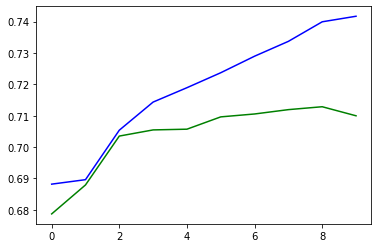

In [0]:
import matplotlib.pyplot as plt

plt.plot(model.history.epoch, model.history.history['accuracy'],'b',
         model.history.epoch, model.history.history['val_accuracy'], 'g')

## **Using LSTM/RNN**

RNN a recurrent neural network is a class of artificial neural network. Unlike feed-forward neural networks, recurrent neural networks have a backward connection between hidden layers. Therefore, they have some kind of memory in them.

**Using Tokenizer to vectorize and convert text into Sequences**

In [0]:
t = Tokenizer()

In [0]:
t.fit_on_texts(df2["reviews.text"])

In [0]:
max_length = max([len(s.split()) for s in df2["reviews.text"] ])
max_legth=max_length

In [37]:
max_length

1858

In [0]:
vocab_size = len(t.word_index)+1

In [39]:
vocab_size

14549

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(df2['reviews.text'], df2['reviews.rating'], test_size=0.25)

In [0]:
xtrain = t.texts_to_sequences(xtrain)
xtest = t.texts_to_sequences(xtest)

In [0]:
xtrain = pad_sequences(xtrain, maxlen=max_length, padding = "post",truncating = "post")
xtest = pad_sequences(xtest, maxlen=max_length, padding = "post", truncating = "post")

In [54]:
xtrain = xtrain[0:28290]
ytrain = ytrain[0:28290]
xtest = xtest[0:9430]
ytest = ytest[0:9430]
len(ytest),len(xtest),len(xtrain),len(ytrain)

(8665, 8665, 25994, 25994)

In [0]:
#converting to categorical
ytrain = np_utils.to_categorical(ytrain, num_classes=6)
ytest = np_utils.to_categorical(ytest, num_classes=6)

**Define the LSTM RNN Model**

LSTM(Long short term memory) is used to remember past data in memory

In [56]:
embedding_dim = 200
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(units = 32))
model.add(Dense(6,activation="softmax")) #since converted to categorical we will have three output nodes. softmax
                                         # assigns a probability distribution
    
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
batch_size = 150
epochs  = 3
history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_data=(xtest,ytest),verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25994 samples, validate on 8665 samples
Epoch 1/3
25994/25994 [==============================] - 633s 24ms/step - loss: 0.2646 - accuracy: 0.8898 - val_loss: 0.2464 - val_accuracy: 0.8968
Epoch 2/3
25994/25994 [==============================] - 637s 24ms/step - loss: 0.2491 - accuracy: 0.8948 - val_loss: 0.2461 - val_accuracy: 0.8968
Epoch 3/3
25994/25994 [==============================] - 633s 24ms/step - loss: 0.2488 - accuracy: 0.8948 - val_loss: 0.2463 - val_accuracy: 0.8968


# **Conclusion**
Using TFIDF the accuracy is 73.38%

Using Word Embeddings its 74.17%

And for RNN Model the accuracy is 89.53% which is most accurate among all others.